<a href="https://colab.research.google.com/github/siddley1001/NCState_Datathon21/blob/master/state_datathon_police.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

__author__ = "Sid Vanam"
__email__ = "vanamsid@gmail.com"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
police_df = pd.read_csv('/content/drive/MyDrive/NCState_DataThon/Raleigh_Police_Incidents_(NIBRS).csv')
police_copy = police_df.copy()
police_df.head(3)

,X,Y,OBJECTID,GlobalID,case_number,crime_category,crime_code,crime_description,crime_type,reported_block_address,city_of_incident,city,district,reported_date,reported_year,reported_month,reported_day,reported_hour,reported_dayofwk,latitude,longitude,agency,updated_date
0,NaN,NaN,12001,9cdee08d-11c8-4789-864b-6965a1b2e620,NaN,MISCELLANEOUS,81H,Miscellaneous/Missing Person (18 & over),NaN,NaN,NaN,RALEIGH,Northeast,2017/01/15 03:28:00+00,2017,1,14,22,Saturday,0.0,0.0,RPD,2017/01/19 20:11:28.950+00
1,NaN,NaN,12002,6f6731f4-dd64-44c7-895c-555de2703c8a,NaN,MISCELLANEOUS,81A,Miscellaneous/All Other Non-Offenses,NaN,NaN,NaN,RALEIGH,North,2017/07/29 12:35:00+00,2017,7,29,8,Saturday,0.0,0.0,RPD,2017/08/01 14:06:50.553+00
2,NaN,NaN,12003,f0fd0e92-448e-4ca8-86c9-e6594564318b,NaN,MISCELLANEOUS,81F,Miscellaneous/Mental Commitment,NaN,NaN,NaN,RALEIGH,Southwest,2016/03/07 03:52:00+00,2016,3,6,22,Sunday,0.0,0.0,RPD,2016/04/14 14:43:38.923+00


In [4]:
def draw_missing_data_table(df):
    ''' Returns a table of % missing from each feature column in the input dataframe'''
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/ df.isnull().count()).sort_values(ascending = False)
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total','Percent Missing'])
    final_missing = missing_data.reset_index().rename(columns = 
                                                      {'index': 'feature', 
                                                       'Total': 'total null', 
                                                       'Percent Missing': '% of null values in the column'})
    return final_missing

draw_missing_data_table(police_df)

,feature,total null,% of null values in the column
0,crime_type,140077,0.414536
1,X,86288,0.255356
2,Y,86288,0.255356
3,reported_block_address,84120,0.248940
4,city_of_incident,84090,0.248851
5,case_number,84089,0.248848
6,city,2,0.000006
7,reported_month,0,0.000000
8,reported_year,0,0.000000
9,reported_date,0,0.000000


In [5]:
police_copy['crime_type'].unique()

array([nan, 'CRIMES AGAINST PERSONS', 'CRIMES AGAINST PROPERTY',
       'CRIMES AGAINST SOCIETY'], dtype=object)

With lots of *crime_type missing* we will **drop** the feature



In [6]:
crime_reported_dict = {np.nan: 0, 'CRIMES AGAINST PERSONS': 1, 'CRIMES AGAINST PROPERTY': 1, 'CRIMES AGAINST SOCIETY': 1}
police_copy['crime_type_reported'] = police_copy['crime_type'].map(crime_reported_dict).astype(bool)
police_copy.drop('crime_type', axis=1, inplace = True)

In [7]:
draw_missing_data_table(police_copy)

,feature,total null,% of null values in the column
0,X,86288,0.255356
1,Y,86288,0.255356
2,reported_block_address,84120,0.248940
3,city_of_incident,84090,0.248851
4,case_number,84089,0.248848
5,city,2,0.000006
6,OBJECTID,0,0.000000
7,GlobalID,0,0.000000
8,crime_category,0,0.000000
9,crime_code,0,0.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

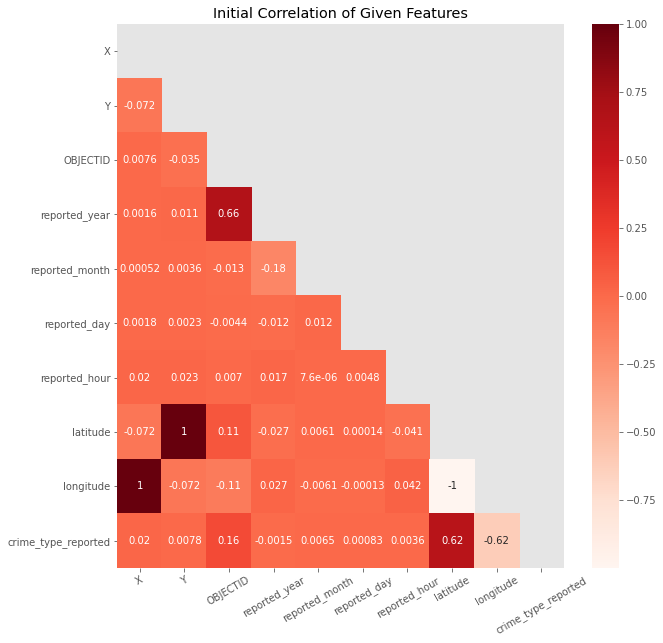

In [8]:
plt.figure(figsize = (10,10))
plt.title('Initial Correlation of Given Features')
mask = np.triu(np.ones_like(police_copy.corr(), dtype= bool))
sns.heatmap(police_copy.corr(), annot = True, cmap = 'Reds', mask = mask)
plt.xticks(rotation= 30)

X = Longitude
Y = Latitude

**Drop EITHER X or Y** since they are perfectly correlated

In [9]:
police_copy.drop(['X', 'Y'], axis = 1, inplace = True)
draw_missing_data_table(police_copy)

,feature,total null,% of null values in the column
0,reported_block_address,84120,0.248940
1,city_of_incident,84090,0.248851
2,case_number,84089,0.248848
3,city,2,0.000006
4,crime_type_reported,0,0.000000
5,district,0,0.000000
6,GlobalID,0,0.000000
7,crime_category,0,0.000000
8,crime_code,0,0.000000
9,crime_description,0,0.000000


**Drop Unique Identifiers**:
- OBJECTID
- GlobalID

In [10]:
police_copy.drop(['OBJECTID', 'GlobalID'], axis = 1, inplace= True)

In [11]:
police_copy[police_copy.city.isna()]

#Drop City rows that are NA
police_copy.drop([194181, 326946], axis = 0, inplace= True)

In [12]:
police_df['agency'].unique()
print('The agency of authority is the Raleigh PD (RPD)')
police_df.drop('agency', axis = 1, inplace = True)

The agency of authority is the Raleigh PD (RPD)


Drop Records that don't have a case_number

In [13]:
police_copy['case_number'].dropna(inplace = True)

In [14]:
copy_index = police_copy.index
null_case = police_copy['case_number'].isnull()

null_case_indices = copy_index[null_case].tolist()

police_copy.drop(null_case_indices, axis = 0, inplace = True)
draw_missing_data_table(police_copy)

,feature,total null,% of null values in the column
0,reported_block_address,31,0.000122
1,city_of_incident,1,0.000004
2,crime_type_reported,0,0.000000
3,reported_date,0,0.000000
4,crime_category,0,0.000000
5,crime_code,0,0.000000
6,crime_description,0,0.000000
7,city,0,0.000000
8,district,0,0.000000
9,reported_year,0,0.000000


In [15]:
#Drop Reported_block_address null row
copy_index = police_copy.index
null_block = police_copy['reported_block_address'].isnull()

null_block_indices = copy_index[null_block].tolist()

police_copy.drop(null_block_indices, axis = 0, inplace = True)
draw_missing_data_table(police_copy)

,feature,total null,% of null values in the column
0,city_of_incident,1,0.000004
1,crime_type_reported,0,0.000000
2,reported_date,0,0.000000
3,crime_category,0,0.000000
4,crime_code,0,0.000000
5,crime_description,0,0.000000
6,reported_block_address,0,0.000000
7,city,0,0.000000
8,district,0,0.000000
9,reported_year,0,0.000000


In [16]:
#Drop City_of_incident null row
copy_index = police_copy.index
null_incidentcity = police_copy['city_of_incident'].isnull()

null_city_indices = copy_index[null_incidentcity].tolist()

police_copy.drop(null_city_indices, axis = 0, inplace = True)
draw_missing_data_table(police_copy)

,feature,total null,% of null values in the column
0,crime_type_reported,0,0.0
1,reported_date,0,0.0
2,crime_category,0,0.0
3,crime_code,0,0.0
4,crime_description,0,0.0
5,reported_block_address,0,0.0
6,city_of_incident,0,0.0
7,city,0,0.0
8,district,0,0.0
9,reported_year,0,0.0


In [17]:
print('We were able to keep %s amount of Data after removing Null Rows' % round(100*police_copy.shape[0]/police_df.shape[0], 2))

We were able to keep 75.11 amount of Data after removing Null Rows


# Cities have overlaps from miscapitalied entry

In [18]:
police_copy['city'].unique()

array(['RALEIGH', 'WAKE FOREST', 'Garner', 'MORRISVILLE', 'Cary',
       'MAITLAND', 'APEX', 'wake forest', 'garner', 'FUQUAY VARINA',
       'HOLLY SPRINGS', 'KNIGHTDALE', 'CARY', 'Raleigh', 'GARNER',
       'Fuquay Varina', 'raleigh', 'ZEBULON', 'WENDELL', 'Wilmington',
       'COLUMBIA', 'MELBOURNE', 'BENTON HARBOR, MI', 'GOSHEN',
       'Knightdale', 'Wendell', 'Durham', 'cary', 'Youngsville',
       'Morrisville', 'durham', 'Holly Springs', 'Wake Forest', '`',
       'Zebulon', 'Clayton'], dtype=object)

In [19]:
police_copy[police_copy['city'] == '`']
print('Map the "`" to RALEIGH after checking the Longitude and Latitude')

Map the "`" to RALEIGH after checking the Longitude and Latitude


In [20]:
city_dict = {'RALEIGH': 'RALEIGH',
 'GARNER': 'GARNER',
 'WAKE FOREST': 'WAKE FOREST',
 'Raleigh': 'RALEIGH',
 'Miscellaneous/Missing Person (16-over)' : 'UNREPORTED',
 'raleigh': 'RALEIGH',
 'Garner': 'GARNER',
 'MORRISVILLE': 'MORRISVILLE',
 'Cary': 'CARY',
 'MAITLAND': 'MAITLAND',
 'APEX': 'APEX',
 'wake forest': 'WAKE FOREST',
 'garner': 'GARNER',
 'FUQUAY VARINA': 'FUQUAY VARINA',
 'HOLLY SPRINGS': 'HOLLY SPRINGS',
 'KNIGHTDALE': 'KNIGHTDALE',
 'CARY': 'CARY',
 'Fuquay Varina': 'FUQUAY VARINA',
 'ZEBULON': 'ZEBULON',
 'WENDELL': 'WENDELL',
 'Wilmington': 'WILMINGTON',
 'COLUMBIA': 'COLUMBIA',
 'MELBOURNE': 'MELBOURNE',
 'SALEMBURG': 'SALEMBURG',
 'BENTON HARBOR, MI': 'BENTON HARBOR, MI',
 'GOSHEN': 'GOSHEN',
 np.nan: 'UNREPORTED',
 'Knightdale': 'KNIGHTDALE',
 'Wendell': 'WENDELL',
 'Rolesville': 'ROLESVILLE',
 'Wake Forest': 'WAKE FOREST',
 'Durham': 'DURHAM',
 'cary': 'CARY',
 'Youngsville': 'YOUNGSVILLE',
 'Morrisville': 'MORRISVILLE',
 'durham': 'DURHAM',
 'Holly Springs': 'HOLLY SPRINGS',
 '`': 'RALEIGH',
 'Zebulon': 'ZEBULON',
 'Clayton': 'CLAYTON',
 'SPARTA': 'SPARTA'}

In [21]:
police_copy['city'] = police_copy['city'].map(city_dict)
police_copy['city'].value_counts()

RALEIGH              253631
GARNER                   29
CARY                     27
WAKE FOREST              25
MORRISVILLE              22
HOLLY SPRINGS            10
APEX                     10
ZEBULON                   8
FUQUAY VARINA             7
KNIGHTDALE                5
DURHAM                    5
WENDELL                   5
CLAYTON                   1
COLUMBIA                  1
GOSHEN                    1
MAITLAND                  1
WILMINGTON                1
MELBOURNE                 1
BENTON HARBOR, MI         1
YOUNGSVILLE               1
Name: city, dtype: int64

# Transform Feature Columns so they are ML Model Digestible

In [22]:
police_copy.head()

,case_number,crime_category,crime_code,crime_description,reported_block_address,city_of_incident,city,district,reported_date,reported_year,reported_month,reported_day,reported_hour,reported_dayofwk,latitude,longitude,agency,updated_date,crime_type_reported
230,P15056938,SEX OFFENSES,17N,Sex Offense/Peeping Tom,200 BLOCK LIGHTNER LN,RALEIGH,RALEIGH,Southeast,2015/10/14 05:08:00+00,2015,10,14,1,Wednesday,35.778483,-78.613348,RPD,2017/01/26 20:52:06.377+00,False
270,P17032009,SEX OFFENSES,17N,Sex Offense/Peeping Tom,5600 BLOCK BRIER OAKS LANE,RALEIGH,RALEIGH,Northwest,2017/06/13 19:21:00+00,2017,6,13,15,Tuesday,35.855529,-78.713100,RPD,2017/06/23 13:08:37.569+00,False
342,P17023148,SEX OFFENSES,17N,Sex Offense/Peeping Tom,7300 BLOCK OLD WAKE FOREST RD,RALEIGH,RALEIGH,Northeast,2017/05/01 23:01:00+00,2017,5,1,19,Monday,35.869659,-78.577395,RPD,2017/07/01 01:00:39.567+00,False
390,P14108837,SEX OFFENSES,17N,Sex Offense/Peeping Tom,3400 BLOCK DOGWOOD DR,RALEIGH,RALEIGH,Northeast,2014/12/07 03:01:00+00,2014,12,6,22,Saturday,35.810131,-78.581056,RPD,2014/12/12 19:11:08.227+00,False
631,P14112653,SEX OFFENSES,17N,Sex Offense/Peeping Tom,4300 BLOCK SNIPE CREEK LN,RALEIGH,RALEIGH,Northwest,2014/12/26 02:02:00+00,2014,12,25,21,Thursday,35.878468,-78.700296,RPD,2016/02/02 17:55:14.617+00,False


In [23]:
print('There are %s cases that had >1 Crimes' % (police_copy.shape[0] - police_copy['case_number'].nunique()))

There are 30949 cases that had >1 Crimes


In [24]:
duplicated_df = police_copy[police_copy['case_number'].duplicated(keep=False)].sort_values('case_number', ascending = True)
duplicated_df.head(3)

,case_number,crime_category,crime_code,crime_description,reported_block_address,city_of_incident,city,district,reported_date,reported_year,reported_month,reported_day,reported_hour,reported_dayofwk,latitude,longitude,agency,updated_date,crime_type_reported
249389,P14071087,LIQUOR LAW VIOLATIONS,71M,Liquor-Alcohol Law Violations,800 BLOCK NEW BERN AV,RALEIGH,RALEIGH,Southeast,2014/06/01 05:27:00+00,2014,6,1,1,Sunday,35.780025,-78.626459,RPD,2015/06/26 17:33:26.897+00,False
249387,P14071087,TRAFFIC,71A,Traffic/DWI (Driving While Impaired),800 BLOCK NEW BERN AV,RALEIGH,RALEIGH,Southeast,2014/06/01 05:27:00+00,2014,6,1,1,Sunday,35.780025,-78.626459,RPD,2015/06/26 17:33:26.897+00,False
249388,P14071087,DRUG VIOLATIONS,54B,Drug Violation/Possession,800 BLOCK NEW BERN AV,RALEIGH,RALEIGH,Southeast,2014/06/01 05:27:00+00,2014,6,1,1,Sunday,35.780025,-78.626459,RPD,2015/06/26 17:33:26.897+00,True


## Crime Code and Description Dictionary

In [25]:
code_dict = {}
for code, description in zip(police_copy['crime_code'], police_copy['crime_description']):
    if code not in code_dict.keys():
        code_dict[code] = description
    else:
        pass

In [26]:
code_desc_df = pd.Series(code_dict)
code_desc_df

17N                               Sex Offense/Peeping Tom
25E                                        Assault/Simple
56A                       Fraud/False Pretense or Swindle
80B                  All Other/Damage to Property (minor)
35F                      Larceny/Theft from Motor Vehicle
                              ...                        
119I                     FRAUD/ALL OTHER / IDENTITY THEFT
267                                 ALL OTHER/TRESPASSING
57B                Gambling/Operating-Promotion-Assisting
13                          Homicide/Justifiable Homicide
188     DRUGS/POSSESSION/OTHER DANGEROUS NONNARCOTIC D...
Length: 101, dtype: object

In [27]:
print('101 unique crimes occured in the ML Feedable dataframe')

101 unique crimes occured in the ML Feedable dataframe


## Reported_Hour was incorrect

In [28]:
police_copy['reported_date'] = pd.to_datetime(police_copy['reported_date'])
police_copy['reported_hour'] = police_copy['reported_date'].dt.hour

## Drop unfeedable Features

Text(0.5, 0, 'Number of Incidents')

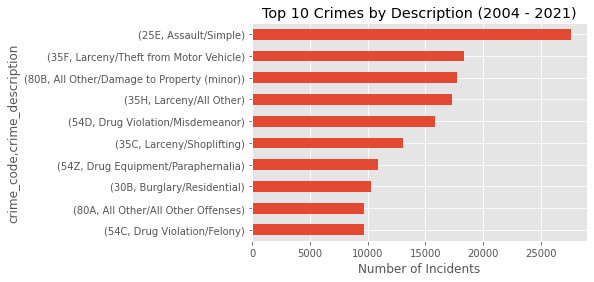

In [29]:
police_copy.groupby(['crime_code', 'crime_description'])['district'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh', title = 'Top 10 Crimes by Description (2004 - 2021)')
plt.xlabel('Number of Incidents')

Text(0, 0.5, 'Number of Cases')

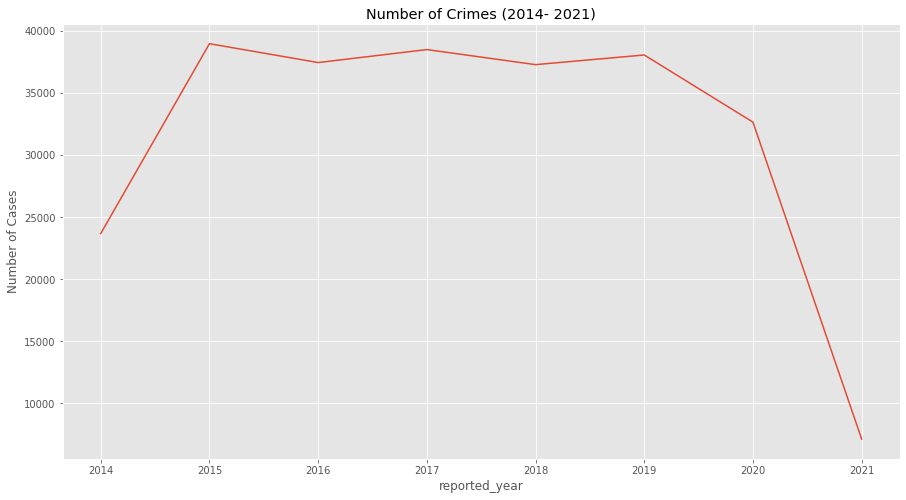

In [30]:
police_copy.groupby('reported_year')['crime_description'].count().plot(kind = 'line', figsize = (15,8), title = 'Number of Crimes (2014- 2021)')
plt.ylabel('Number of Cases')

In [31]:
crime_type_df = pd.crosstab(police_copy['reported_year'], police_copy['crime_description']) 
crime_type_df.sum(axis = 0).sort_values(ascending = False).head(10).index.tolist()

crime_type_df = crime_type_df[['Assault/Simple',
 'Larceny/Theft from Motor Vehicle',
 'All Other/Damage to Property (minor)',
 'Larceny/All Other',
 'Drug Violation/Misdemeanor',
 'Larceny/Shoplifting',
 'Drug Equipment/Paraphernalia',
 'Burglary/Residential',
 'All Other/All Other Offenses',
 'Drug Violation/Felony']]

Text(0, 0.5, 'Total Number of Cases')

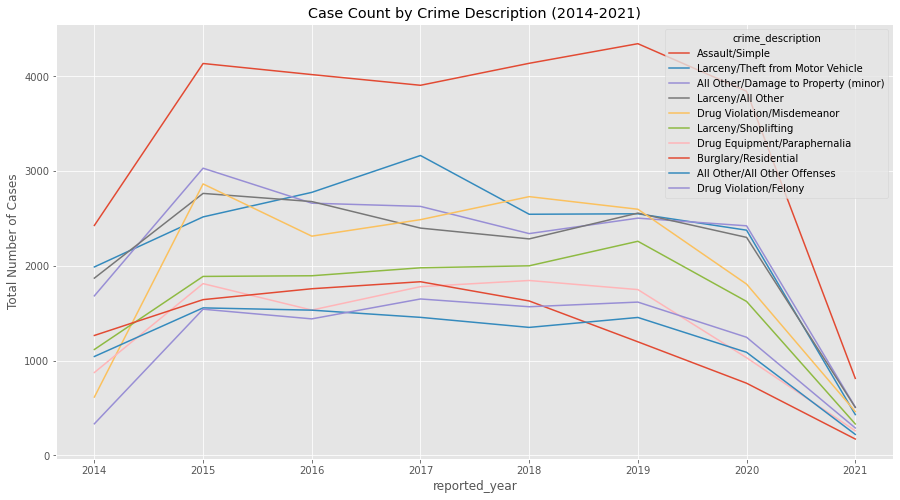

In [32]:
crime_type_df.plot.line(figsize = (15,8), title = 'Case Count by Crime Description (2014-2021)')
plt.ylabel('Total Number of Cases')

In [33]:
police_copy['latlong_div'] = abs(police_copy['latitude'] / police_copy['longitude'])
police_copy.drop('longitude', axis = 1, inplace = True)
police_copy.head(2)

,case_number,crime_category,crime_code,crime_description,reported_block_address,city_of_incident,city,district,reported_date,reported_year,reported_month,reported_day,reported_hour,reported_dayofwk,latitude,agency,updated_date,crime_type_reported,latlong_div
230,P15056938,SEX OFFENSES,17N,Sex Offense/Peeping Tom,200 BLOCK LIGHTNER LN,RALEIGH,RALEIGH,Southeast,2015-10-14 05:08:00+00:00,2015,10,14,5,Wednesday,35.778483,RPD,2017/01/26 20:52:06.377+00,False,0.455120
270,P17032009,SEX OFFENSES,17N,Sex Offense/Peeping Tom,5600 BLOCK BRIER OAKS LANE,RALEIGH,RALEIGH,Northwest,2017-06-13 19:21:00+00:00,2017,6,13,19,Tuesday,35.855529,RPD,2017/06/23 13:08:37.569+00,False,0.455522


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

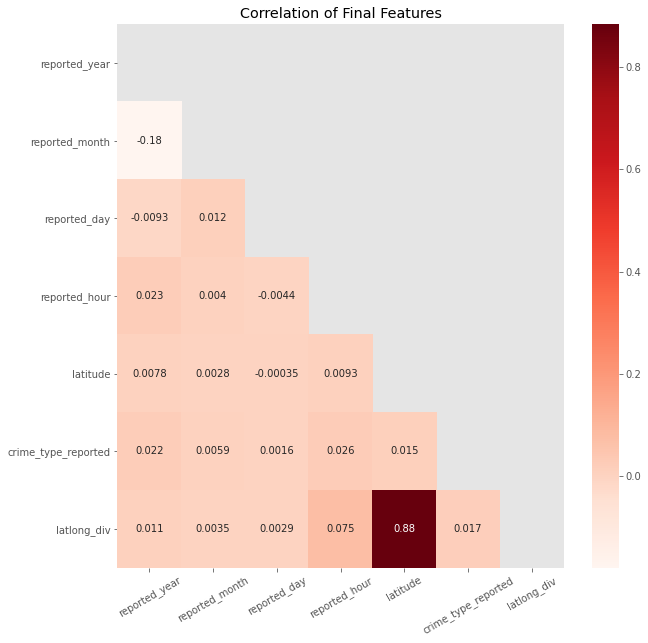

In [34]:
plt.figure(figsize = (10,10))
plt.title('Correlation of Final Features')
mask = np.triu(np.ones_like(police_copy.corr(), dtype= bool))
sns.heatmap(police_copy.corr(), annot = True, cmap='Reds', mask = mask)
plt.xticks(rotation= 30)

## Column DTypes
- Numerical:
    - reported_year
    - reported_month
    - reported_day
    - reported_hour
    - longlat_interaction
- Categorical (OHE):
    - case_number
    - crime_category
    - crime_code
    - reported_block_address
    - city_of_incident
    - city
    - reported_dayofwk
    - crime_type_reported
    - **district [TARGET FEATURE]**


#Key Visualizations for Understanding Features

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

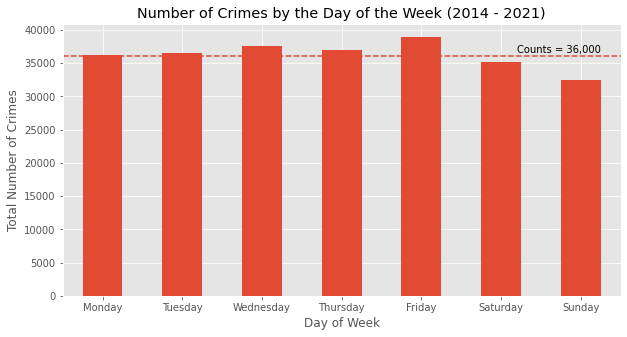

In [35]:
weekday_crime = police_copy['reported_dayofwk'].value_counts()
weekday_crime.index = pd.Categorical(weekday_crime.index, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize = (10,5))
plt.title('Number of Crimes by the Day of the Week (2014 - 2021)')
plt.xlabel('Day of Week')
plt.ylabel('Total Number of Crimes')

weekday_crime.sort_index().plot(kind = 'bar')
plt.axhline(36000, ls = '--')
plt.text(5.2, 36500, 'Counts = 36,000')

plt.xticks(rotation = 0)

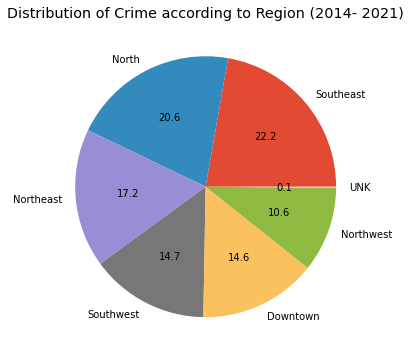

In [36]:
plt.figure(figsize = (10,5))
police_copy['district'].value_counts().plot(kind = 'pie', autopct = '%.1f', label = '', 
                                            figsize = (6,6), title = 'Distribution of Crime according to Region (2014- 2021)')

Text(0.5, 0, 'Number of Incidents')

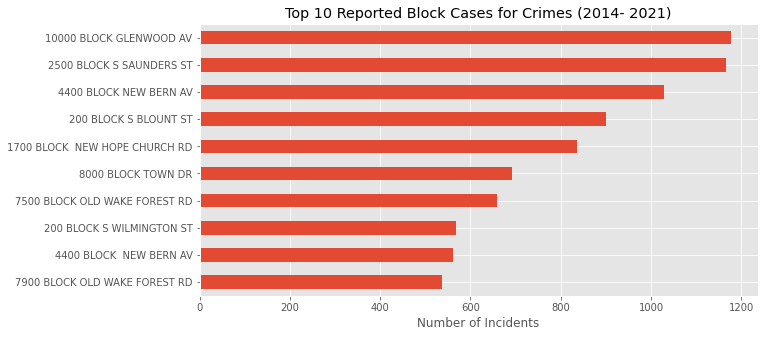

In [37]:
plt.figure(figsize = (10,5))
police_copy['reported_block_address'].value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh', title = 'Top 10 Reported Block Cases for Crimes (2014- 2021)')
plt.xlabel('Number of Incidents')

# Machine Learning

In [38]:
#Import Various Regression models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


#Import pipeline components from Scikit Learn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, TimeSeriesSplit, train_test_split

In [39]:
police_copy.sort_values('reported_date', inplace=True)

In [40]:
y = police_copy.district
y_map = {'North': 0, 'Northwest': 1, 'Southwest': 2, 'Downtown': 3, 'Southeast': 4,
       'Northeast': 5, 'UNK': 6}
y = y.map(y_map).values

X = police_copy.drop('district', axis =1)
X.drop(['crime_description', 'reported_date', 'agency', 
        'updated_date'], axis=1, inplace=True)
# X = X.values

In [41]:
y

array([0, 1, 0, ..., 2, 2, 4])

In [42]:
X

,case_number,crime_category,crime_code,reported_block_address,city_of_incident,city,reported_year,reported_month,reported_day,reported_hour,reported_dayofwk,latitude,crime_type_reported,latlong_div
94819,P14071089,WEAPONS VIOLATION,51C,4500 BLOCK HARGROVE RD,RALEIGH,RALEIGH,2014,6,1,4,Sunday,35.844984,True,0.456097
88894,P14071073,ASSAULT,25E,5900 BLOCK WATERFORD BLUFF LN,RALEIGH,RALEIGH,2014,6,1,4,Sunday,35.858934,True,0.455552
92642,P14071076,LARCENY FROM MV,35F,3900 BLOCK GREEN RD,RALEIGH,RALEIGH,2014,6,1,4,Sunday,35.836955,True,0.455985
144709,P14071079,ASSAULT,25A,4200 BLOCK GREEN RD,RALEIGH,RALEIGH,2014,6,1,4,Sunday,35.841265,True,0.456052
40493,P14071082,TRAFFIC,71A,HILLSBOROUGH ST & JONES FRANKLIN RD,RALEIGH,RALEIGH,2014,6,1,5,Sunday,35.786414,False,0.454600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337901,P21013236,TRAFFIC,71A,1200 BLOCK CAPITAL BLVD,RALEIGH,RALEIGH,2021,3,20,4,Saturday,35.798129,False,0.455222
337902,P21013237,LARCENY,35C,4400 BLOCK LOUISBURG RD,RALEIGH,RALEIGH,2021,3,20,4,Saturday,35.842817,True,0.456169
337903,P21013243,VANDALISM,80B,2000 BLOCK FAIRVIEW RD,RALEIGH,RALEIGH,2021,3,20,5,Saturday,35.805028,False,0.455260
337904,P21013244,WEAPONS VIOLATION,51C,4700 BLOCK WESTGROVE ST,RALEIGH,RALEIGH,2021,3,20,6,Saturday,35.786909,True,0.454722


In [43]:
X_dum = pd.get_dummies(X[['case_number', 'crime_category', 'crime_code', 'reported_block_address', 'city_of_incident', 'city', 'reported_dayofwk', 'crime_type_reported']], drop_first = True, sparse = True)

In [44]:
X_short = X.drop(['case_number', 'crime_category', 'crime_code', 'reported_block_address', 'city_of_incident', 'city', 'reported_dayofwk', 'crime_type_reported'], axis =1, inplace = True)
X_final = pd.concat([X_short, X_dum], axis =1)

In [45]:
X_final

,crime_type_reported,case_number_P14071073,case_number_P14071076,case_number_P14071079,case_number_P14071082,case_number_P14071085,case_number_P14071087,case_number_P14071089,case_number_P14071092,case_number_P14071093,case_number_P14071094,case_number_P14071097,case_number_P14071100,case_number_P14071102,case_number_P14071103,case_number_P14071105,case_number_P14071106,case_number_P14071107,case_number_P14071108,case_number_P14071109,case_number_P14071110,case_number_P14071111,case_number_P14071116,case_number_P14071117,case_number_P14071119,case_number_P14071120,case_number_P14071121,case_number_P14071124,case_number_P14071125,case_number_P14071127,case_number_P14071132,case_number_P14071133,case_number_P14071138,case_number_P14071142,case_number_P14071145,case_number_P14071147,case_number_P14071148,case_number_P14071149,case_number_P14071155,case_number_P14071157,...,reported_block_address_YUCCA TRL & LEGGING LN,reported_block_address_ZEBULON RD & CUNNINGHAM RD,city_of_incident_CARY,city_of_incident_DURHAM,city_of_incident_FUQUAY-VARINA,city_of_incident_GARNER,city_of_incident_HOLLY SPRINGS,city_of_incident_KNIGHTDALE,city_of_incident_MORRISVILLE,city_of_incident_RALEIGH,city_of_incident_ROLESVILLE,city_of_incident_WAKE COUNTY,city_of_incident_WAKE FOREST,city_of_incident_WENDELL,city_of_incident_ZEBULON,"city_BENTON HARBOR, MI",city_CARY,city_CLAYTON,city_COLUMBIA,city_DURHAM,city_FUQUAY VARINA,city_GARNER,city_GOSHEN,city_HOLLY SPRINGS,city_KNIGHTDALE,city_MAITLAND,city_MELBOURNE,city_MORRISVILLE,city_RALEIGH,city_WAKE FOREST,city_WENDELL,city_WILMINGTON,city_YOUNGSVILLE,city_ZEBULON,reported_dayofwk_Monday,reported_dayofwk_Saturday,reported_dayofwk_Sunday,reported_dayofwk_Thursday,reported_dayofwk_Tuesday,reported_dayofwk_Wednesday
94819,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
88894,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
92642,True,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
144709,True,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
40493,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337901,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
337902,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
337903,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
337904,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2, random_state = 42)

# Generate Classifiers

In [47]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgbc = XGBClassifier()
lgbmc = LGBMClassifier()

## Build Transformers and Pipelines

In [48]:
# ohe = OneHotEncoder(drop= 'first', sparse= False)
# transformer = [('ohe', ohe, ['case_number', 'crime_category', 'crime_code', 'reported_block_address', 
#                              'city_of_incident', 'city', 'reported_dayofwk', 'crime_type_reported'])]


# preprocess_transformer = ColumnTransformer(transformers= transformer, remainder= 'passthrough')

# #Baseline Pipelines for All Classifiers
# pipe1_lr = Pipeline(
#     [
#         ('preprocess_1', preprocess_transformer),
#         ('lr', lr)
#     ]
# )
# pipe1_rf = Pipeline(
#     [
#         ('preprocess_1', preprocess_transformer),
#         ('rfc', rfc)
#     ]
# )
# pipe1_gbr = Pipeline(
#     [
#         ('preprocess_1', preprocess_transformer),
#         ('gbc', gbc)
#     ]
# )
# pipe1_lgbr = Pipeline(
#     [
#         ('preprocess_1', preprocess_transformer),
#         ('lgbmc', lgbmc)
#     ]
# )
# pipe1_xgbr = Pipeline(
#     [
#         ('preprocess_1', preprocess_transformer),
#         ('xgbc', xgbc)
#     ]
# )


In [49]:
# ?pipe1_lr.fit(X_train, y_train)

## Baseline Scores

In [50]:
score_lr = cross_val_score(lr, X_train, y_train, cv=3, scoring='roc_auc', n_jobs = -1)

TerminatedWorkerError: ignored

In [ ]:
score_rf = cross_val_score(rfc, X_train, y_train, cv=3, scoring='roc_auc', n_jobs = 1)
score_gbc = cross_val_score(gbc, X_train, y_train, cv=3, scoring='roc_auc', n_jobs = 1)
score_xgbc = cross_val_score(xgbc, X_train, y_train, cv=3, scoring='roc_auc', n_jobs = 1)
score_lgbmc = cross_val_score(lgbmc, X_train, y_train, cv=3, scoring='roc_auc', n_jobs = 1)
